## Biblioteca importadas

In [30]:

import numpy as np 
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt




## Leitura das bases de dados de cada aeroportos


#### Frequencia de passageiros no aeroporto CWB

In [31]:
#nacional 
filename = r'C:Passageiros pagos\cwb_nac.xlsx'
cwb_nac = pd.read_excel(filename).drop(["Unnamed: 0"],axis=1)

#internacional
filename = r'C:Passageiros pagos\cwb_int.xlsx'
cwb_int = (pd.read_excel(filename)
 .drop(["Unnamed: 0"],axis=1)
 .rename(columns ={'Passageiros':'Passageiros internacionais'})
          )


#### Frequencia de passageiros no aeroporto IGU

In [32]:
#nacional
filename = r'C:Passageiros pagos\igu_nac.xlsx'
igu_nac = pd.read_excel(filename).drop(["Unnamed: 0"],axis=1)

#internacional
filename = r'C:Passageiros pagos\igu_int.xlsx'
igu_int = (pd.read_excel(filename)
 .drop(["Unnamed: 0"],axis=1)
 .rename(columns ={'Passageiros':'Passageiros internacionais'})
          )

#### Frequencia de passageiros no aeroporto NVT

In [33]:
#nacional
filename = r'C:Passageiros pagos\nvt_nac.xlsx'
nvt_nac = pd.read_excel(filename).drop(["Unnamed: 0"],axis=1)

#internacional
filename = r'C:Passageiros pagos\nvt_int.xlsx'
nvt_int = (pd.read_excel(filename)
 .drop(["Unnamed: 0"],axis=1)
 .rename(columns ={'Passageiros':'Passageiros internacionais'})
          )

#### Frequencia de passageiros no aeroporto PMW

In [34]:
filename = r'C:Passageiros pagos\pmw.xlsx'
pmw = pd.read_excel(filename).drop(["Unnamed: 0"],axis=1)

#### Frequencia de passageiros no aeroporto SLZ

In [35]:
filename = r'C:Passageiros pagos\slz.xlsx'
slz = pd.read_excel(filename).drop(["Unnamed: 0"],axis=1)

## Variaveis macro economicas

#### Os dados ja foram puxados em escala logaritmica

#### Valor do barril de petróleo

In [36]:
filename = r'C:Dados macros\statistic_id262858_opec-oil-price-annually-1960-2022.xlsx'
oil = pd.read_excel(filename)
oil.head()

,Ano,Oil
0,1960,1.63
1,1961,1.57
2,1962,1.52
3,1963,1.50
4,1964,1.45


#### Cotação do dolar

In [37]:
filename = r'C:Dados macros\Base de dados Dólar.xlsx'
dolar = pd.read_excel(filename)
dolar = dolar.drop(["valor"], axis =1)
dolar.head()

,Ano,Câmbio
0,2000,0.000000
1,2001,0.283438
2,2002,0.516534
3,2003,-0.184261
4,2004,-0.058498


#### Inflação do turismo no Brasil

In [38]:
filename = r'C:Dados macros\statistic_id270812_inflation-rate-in-brazil-2027.xlsx'
inflacao = pd.read_excel(filename)
inflacao = inflacao.drop(["valor"], axis =1)
inflacao.head()


,Ano,Inflação
0,1987,2.2833
1,1988,6.2912
2,1989,14.3072
3,1990,29.4773
4,1991,4.3277


#### PIB do Brasil e dos Estados dos aeroportos 

In [39]:
filename = r'C:Dados macros\PIB_brasil_freq.xlsx'
pib = pd.read_excel(filename)
pib = pib.drop(["valor"], axis =1)
pib.head()

,Ano,PIB real Brasil
0,2000,0.000000
1,2001,0.000472
2,2002,0.001028
3,2003,0.000387
4,2004,0.001911


# Curitiba

##### juntando os pontos macros e uma unico DataFrame

In [40]:
principal_cwb =(cwb_nac
 .join(cwb_int.set_index('Ano'),on='Ano')
 .join(oil.set_index('Ano'),on='Ano')
 .join(dolar.set_index('Ano'),on='Ano')
 .join(inflacao.set_index('Ano'),on='Ano')
 .join(pib.set_index('Ano'),on='Ano')
          )


#### Correlação entre os dados pré selecionados 

In [41]:
principal_cwb.loc[principal_cwb["Ano"] == 2019, "Passageiros_freq_defasagem"] = 0 
principal_cwb = principal_cwb.loc[principal_cwb["Ano"]<2020]

principal_cwb.drop(["Passageiros internacionais","Passageiros_frequencia", "Ano","numero_de_passageiros","Oil"],axis=1).corr()


,Passageiros_freq_defasagem,Câmbio,Inflação,PIB real Brasil
Passageiros_freq_defasagem,1.000000,-0.378978,-0.229385,0.427399
Câmbio,-0.378978,1.000000,0.077090,-0.058331
Inflação,-0.229385,0.077090,1.000000,-0.353719
PIB real Brasil,0.427399,-0.058331,-0.353719,1.000000


#### Análise grafica 

Utilizamos todas as variaveis em loglog para retirar a tendencia dos dados. Nos gráficos de linha em todos eles, os eixos x é o Ano e os eixos y é a variação do dados que está legendado em cada um dos gráficos.

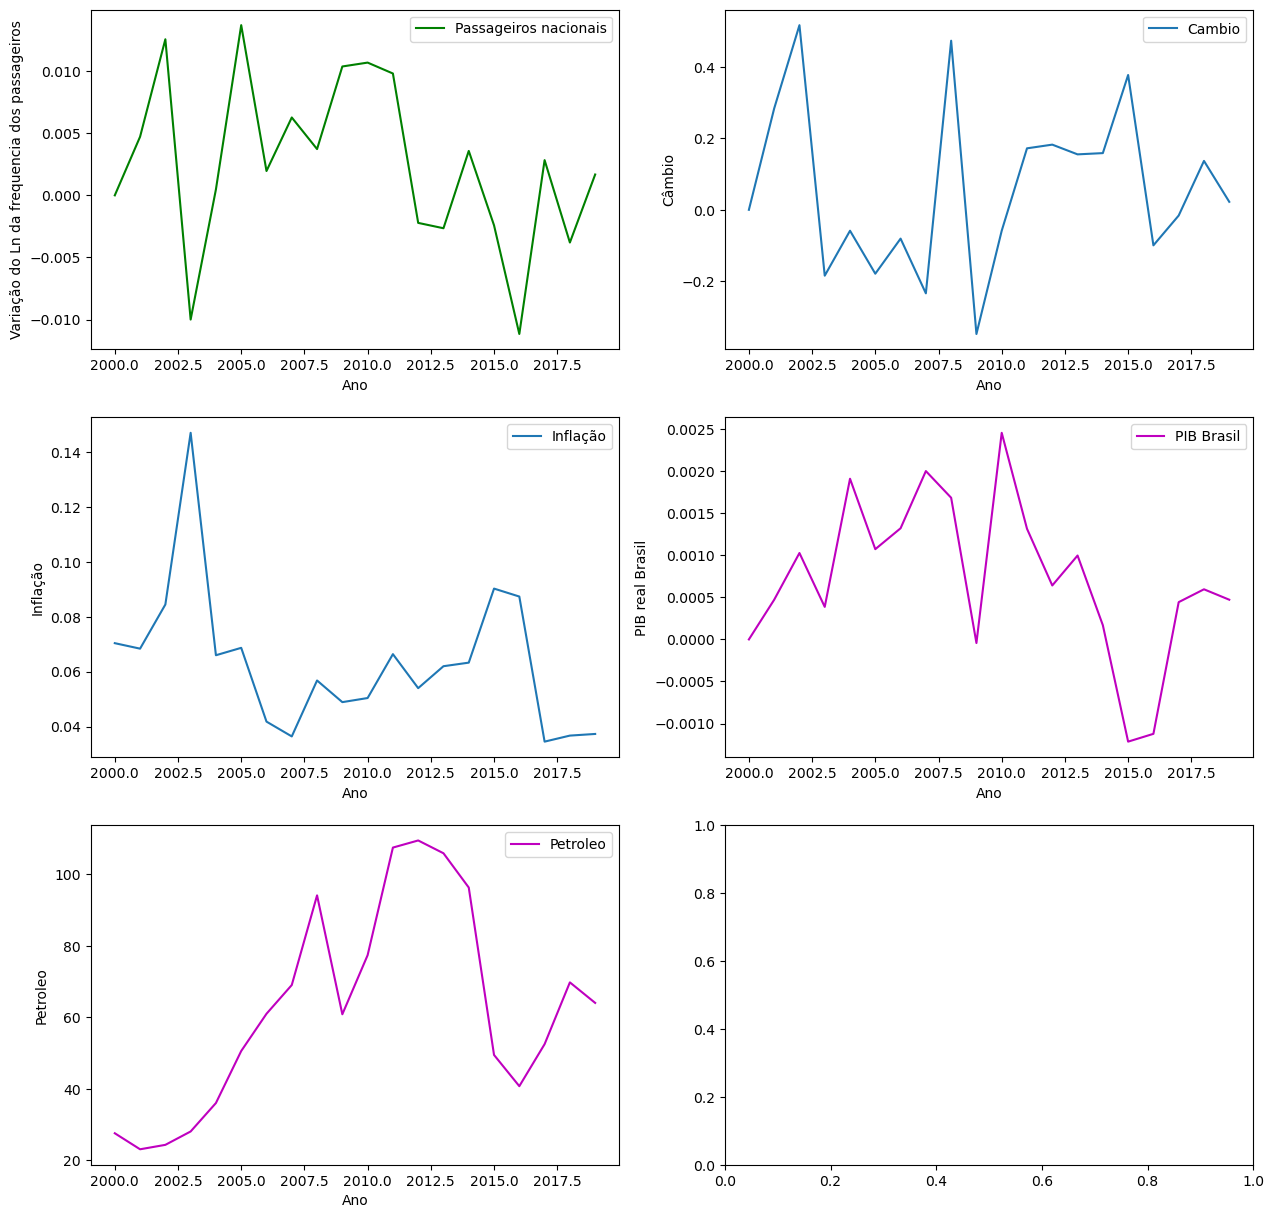

In [42]:
fig, ax = plt.subplots(3,2)

fig.set_size_inches(15,15)



ax[0,0].plot(principal_cwb["Ano"], principal_cwb["Passageiros_frequencia"],"g", label='Passageiros nacionais')
ax[0,0].set_xlabel("Ano")
ax[0,0].set_ylabel("Variação do Ln da frequencia dos passageiros")
ax[0,0].legend()


ax[0,1].plot(principal_cwb["Ano"], principal_cwb["Câmbio"], label = 'Cambio' )
ax[0,1].set_xlabel("Ano")
ax[0,1].set_ylabel("Câmbio")
ax[0,1].legend()

ax[1,0].plot(principal_cwb["Ano"], principal_cwb["Inflação"], label='Inflação')
ax[1,0].set_xlabel("Ano")
ax[1,0].set_ylabel("Inflação")
ax[1,0].legend()


ax[1,1].plot(principal_cwb["Ano"], principal_cwb["PIB real Brasil"],"m", label = 'PIB Brasil' )
ax[1,1].set_xlabel("Ano")
ax[1,1].set_ylabel("PIB real Brasil")
ax[1,1].legend()

ax[2,0].plot(principal_cwb["Ano"], principal_cwb["Oil"],"m", label='Petroleo')
ax[2,0].set_xlabel("Ano")
ax[2,0].set_ylabel("Petroleo")
ax[2,0].legend()

plt.show()

#### Dividindo a base de dados em treinamento e teste 

Nas duas células de códigos seguintes temos a parte de treinamento e teste. O treino foi definido do ano 2000 até 2017 e na parte foi colocado todos os anos de 2000 até 2019. A variavel Y(a ser prevista) foi colocado a frequencia dos passageiros e nas variaveis X (Cambio, PIB real do Brasil e Inflação) e foi retirada todas as outras.

In [43]:
# Para treinamento utilizamos de 2000 até 2017
treino = principal_cwb.loc[principal_cwb["Ano"] < 2017]

# Para teste utilizamos de 2000 até 2019
teste = principal_cwb.loc[principal_cwb["Ano"] >= 2000]

In [44]:
y_train= treino["Passageiros_frequencia"].copy()
y_test= teste["Passageiros_frequencia"].copy()

X_train = treino.drop(["Passageiros_frequencia", "Passageiros internacionais","Ano","numero_de_passageiros","Oil"],axis=1).copy()
X_test = teste.drop(["Passageiros_frequencia", "Passageiros internacionais","Ano", "numero_de_passageiros","Oil"],axis=1).copy()

#### Validação da regressao linear


In [45]:
reg= LinearRegression()
reg.fit(X_train, y_train)
YpredL= reg.predict(X_test)
erro = np.sqrt(mean_squared_error(y_test, YpredL))


#### Dados da regressão

In [46]:
print(f"Coeficiente da regressão linear: {reg.coef_}")
print(f"Coeficiente angular da reta: {reg.intercept_}")
print(reg.get_params())
print(f"O erro do modelo sem ajuste foi: {erro}")

Coeficiente da regressão linear: [-2.64386919e-01  1.46311138e-04 -1.22504636e-01  3.07289999e+00]
Coeficiente angular da reta: 0.009725204828227823
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}
O erro do modelo sem ajuste foi: 0.005720584131793195


##### Tentativa de melhora para a regressão

In [47]:
pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=1)),
    ('lin_reg', LinearRegression())
    #('lin_reg', Ridge(alpha=ALPHA))
])

params = {
    'poly__degree': [1,2,3]
}

clf_pipe = GridSearchCV(pipe, params, cv=3, n_jobs=-1)

clf_pipe.fit(X_train, y_train)

print(clf_pipe.best_params_)

{'poly__degree': 1}


In [48]:
y_pred_pipeline = clf_pipe.predict(X_train)

##### Erro com ajuste

In [49]:
erro = np.sqrt(mean_squared_error(y_train, y_pred_pipeline))

print(f"O erro do modelo com ajuste foi: {erro}")

O erro do modelo com ajuste foi: 0.00540147948584624


##### RMSE

In [50]:
final_model = clf_pipe.best_estimator_

final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print(f'RMSE = {final_rmse}')

RMSE = 0.005720584131793201


#### Analise com OLS

A regressão linear está analisando um periodo de tempo de 19 anos, se iniciando em 2000 até 2019. Foi utilizada a biblioteca OLS (statsmoldels)

In [51]:
import statsmodels.api as sm


x = sm.add_constant(X_train)

model = sm.OLS(y_train, x).fit()


print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     Passageiros_frequencia   R-squared:                       0.419
Model:                                OLS   Adj. R-squared:                  0.226
Method:                     Least Squares   F-statistic:                     2.167
Date:                    Sun, 04 Dec 2022   Prob (F-statistic):              0.135
Time:                            16:43:38   Log-Likelihood:                 64.636
No. Observations:                      17   AIC:                            -119.3
Df Residuals:                          12   BIC:                            -115.1
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

c:\Users\guido\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


##### Grafico Verdadeiro X Predito

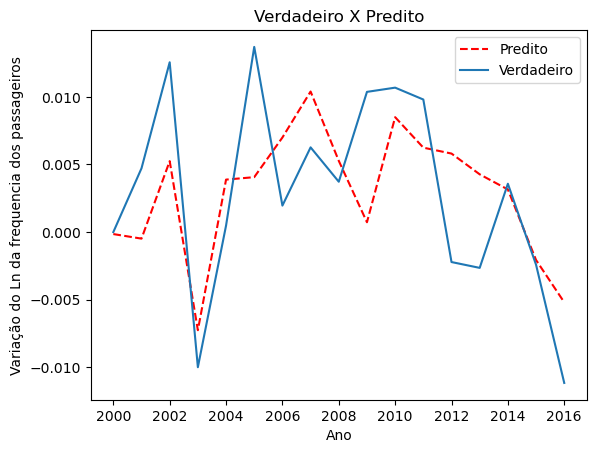

In [52]:
ypred = model.predict(x)
ano_lista = np.arange(2000,2017,1)
principal_cwb = principal_cwb.loc[principal_cwb["Ano"]<2017]


plt.plot(ano_lista,ypred,'--r', label='Predito')
plt.plot(ano_lista, principal_cwb["Passageiros_frequencia"], label = 'Verdadeiro' )
plt.title("Verdadeiro X Predito")
plt.xlabel("Ano")
plt.ylabel("Variação do Ln da frequencia dos passageiros")
plt.legend()
plt.show()

# Foz do Iguaçu

##### juntando os pontos macros e uma unico DataFrame

In [53]:
principal_igu =(igu_nac
 .join(igu_int.set_index('Ano'),on='Ano')
 .join(oil.set_index('Ano'),on='Ano')
 .join(dolar.set_index('Ano'),on='Ano')
 .join(inflacao.set_index('Ano'),on='Ano')
 .join(pib.set_index('Ano'),on='Ano')
          )

##### Correlação entre os dados pré selecionados 

In [54]:
principal_igu.loc[principal_igu["Ano"] == 2019, "Passageiros_freq_defasagem"] = 0 
principal_igu = principal_igu.loc[principal_igu["Ano"]<2020]

principal_igu.drop(["Passageiros internacionais","Passageiros_frequencia", "Ano","numero_de_passageiros","Oil"],axis=1).corr()


,Passageiros_freq_defasagem,Câmbio,Inflação,PIB real Brasil
Passageiros_freq_defasagem,1.000000,-0.362140,0.128012,0.282233
Câmbio,-0.362140,1.000000,0.077090,-0.058331
Inflação,0.128012,0.077090,1.000000,-0.353719
PIB real Brasil,0.282233,-0.058331,-0.353719,1.000000


##### Análise grafica

Utilizamos todas as variaveis em loglog para retirar a tendencia dos dados. Nos gráficos de linha em todos eles, os eixos x é o Ano e os eixos y é a variação do dados que está legendado em cada um dos gráficos.

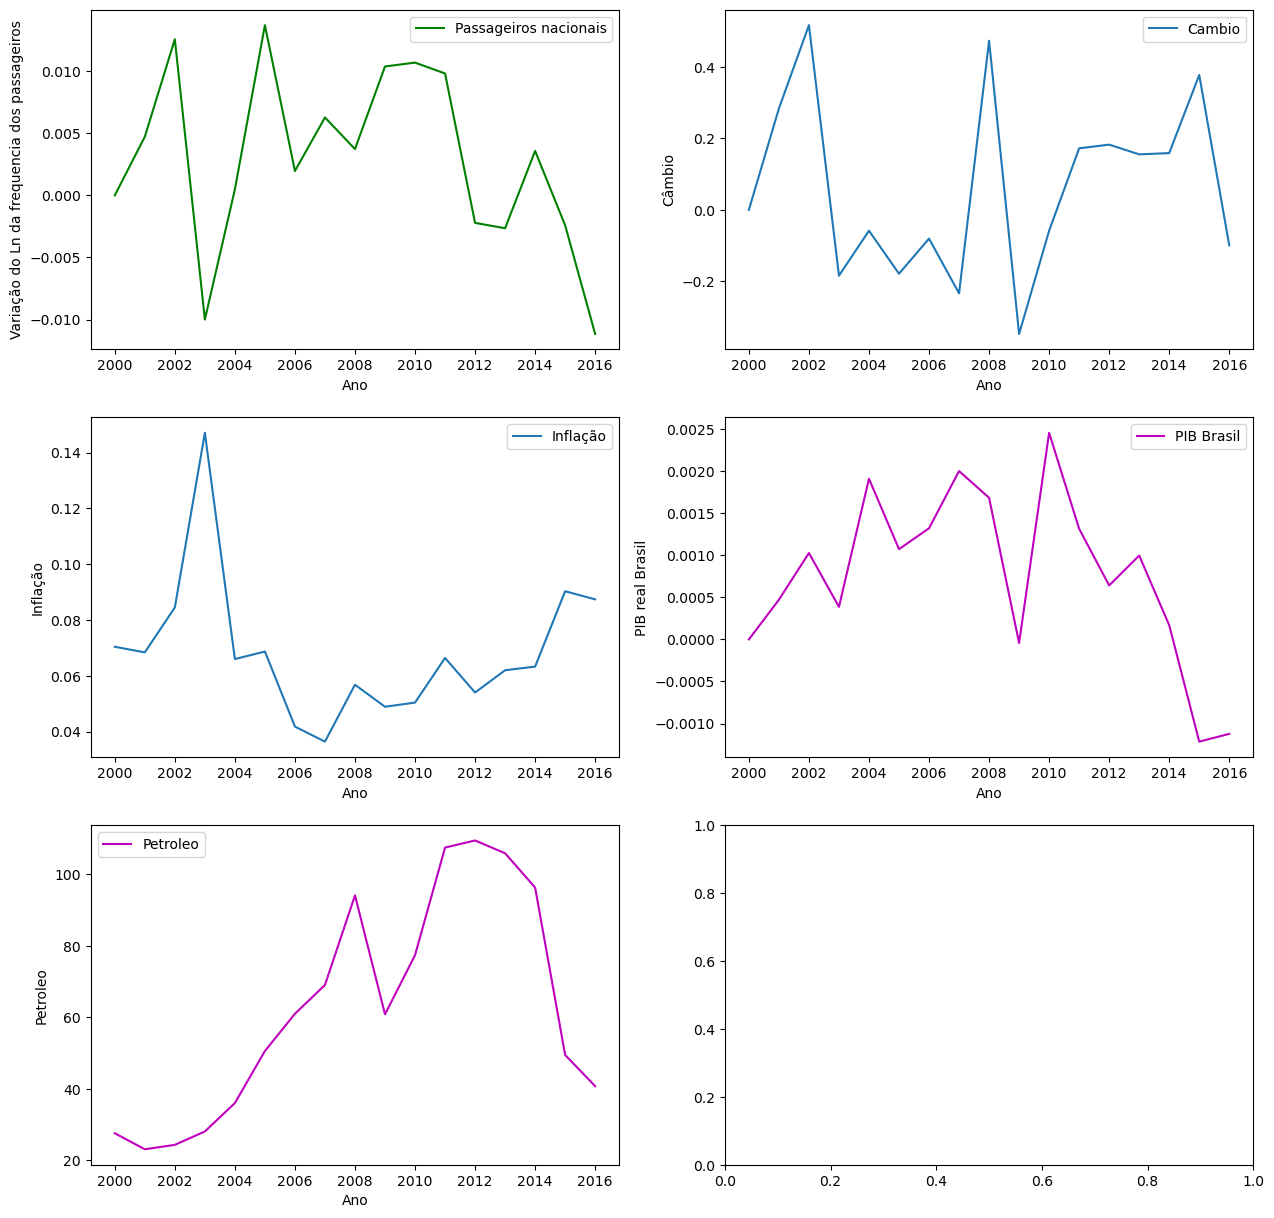

In [55]:
fig, ax = plt.subplots(3,2)

fig.set_size_inches(15,15)



ax[0,0].plot(principal_cwb["Ano"], principal_cwb["Passageiros_frequencia"],"g", label='Passageiros nacionais')
ax[0,0].set_xlabel("Ano")
ax[0,0].set_ylabel("Variação do Ln da frequencia dos passageiros")
ax[0,0].legend()


ax[0,1].plot(principal_cwb["Ano"], principal_cwb["Câmbio"], label = 'Cambio' )
ax[0,1].set_xlabel("Ano")
ax[0,1].set_ylabel("Câmbio")
ax[0,1].legend()

ax[1,0].plot(principal_cwb["Ano"], principal_cwb["Inflação"], label='Inflação')
ax[1,0].set_xlabel("Ano")
ax[1,0].set_ylabel("Inflação")
ax[1,0].legend()


ax[1,1].plot(principal_cwb["Ano"], principal_cwb["PIB real Brasil"],"m", label = 'PIB Brasil' )
ax[1,1].set_xlabel("Ano")
ax[1,1].set_ylabel("PIB real Brasil")
ax[1,1].legend()

ax[2,0].plot(principal_cwb["Ano"], principal_cwb["Oil"],"m", label='Petroleo')
ax[2,0].set_xlabel("Ano")
ax[2,0].set_ylabel("Petroleo")
ax[2,0].legend()

plt.show()

#### Dividindo a base de dados em treinamento e teste

Nas duas células de códigos seguintes temos a parte de treinamento e teste. O treino foi definido do ano 2000 até 2017 e na parte foi colocado todos os anos de 2000 até 2019. A variavel Y(a ser prevista) foi colocado a frequencia dos passageiros e nas variaveis X (Cambio, PIB real do Brasil e Inflação) e foi retirada todas as outras.

In [56]:
treino = principal_igu.loc[principal_igu["Ano"] < 2017]
teste = principal_igu.loc[principal_igu["Ano"] >= 2000]

In [57]:
y_train= treino["Passageiros_frequencia"].copy()
y_test= teste["Passageiros_frequencia"].copy()

X_train = treino.drop(["Passageiros_frequencia", "Passageiros internacionais","Ano","numero_de_passageiros","Oil"],axis=1).copy()
X_test = teste.drop(["Passageiros_frequencia", "Passageiros internacionais","Ano","numero_de_passageiros","Oil"],axis=1).copy()

### Regresao linear

In [58]:
reg= LinearRegression()
reg.fit(X_train, y_train)
YpredL= reg.predict(X_test)
erro = np.sqrt(mean_squared_error(y_test, YpredL))



#### Dados da regrssao

In [59]:
print(f"Coeficiente da regressão linear: {reg.coef_}")
print(f"Coeficiente angular da reta: {reg.intercept_}")
print(f"O erro do modelo sem ajuste foi: {erro}")

Coeficiente da regressão linear: [ 3.22445222e-02 -5.00918193e-03  9.67117583e-02  5.19209915e+00]
Coeficiente angular da reta: -0.00469367095218824
O erro do modelo sem ajuste foi: 0.009315659584372828


##### Tentativa de melhora para a regrssao

In [60]:
pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=1)),
    ('lin_reg', LinearRegression())
])

params = {
    'poly__degree': [1,2,3]
}

clf_pipe = GridSearchCV(pipe, params, cv=3, n_jobs=-1)

clf_pipe.fit(X_train, y_train)

print(clf_pipe.best_params_)

{'poly__degree': 1}


In [61]:
y_pred_pipeline = clf_pipe.predict(X_train)

##### Erro com ajuste

In [62]:
erro = np.sqrt(mean_squared_error(y_train, y_pred_pipeline))

print(f"O erro do modelo com ajuste foi: {erro}")

O erro do modelo com ajuste foi: 0.00975636125777233


##### RMSE

In [63]:
final_model = clf_pipe.best_estimator_

final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print(f'RMSE = {final_rmse}')

RMSE = 0.00931565958437283


#### Analise com OLS

A regressão linear está analisando um periodo de tempo de 19 anos, se iniciando em 2000 até 2019. Foi utilizada a biblioteca OLS (statsmoldels)

In [64]:
import statsmodels.api as sm


x = sm.add_constant(X_train)

model = sm.OLS(y_train, x).fit()


print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     Passageiros_frequencia   R-squared:                       0.205
Model:                                OLS   Adj. R-squared:                 -0.060
Method:                     Least Squares   F-statistic:                    0.7721
Date:                    Sun, 04 Dec 2022   Prob (F-statistic):              0.564
Time:                            16:43:41   Log-Likelihood:                 54.585
No. Observations:                      17   AIC:                            -99.17
Df Residuals:                          12   BIC:                            -95.00
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

c:\Users\guido\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


##### Grafico Verdadeiro X Predito

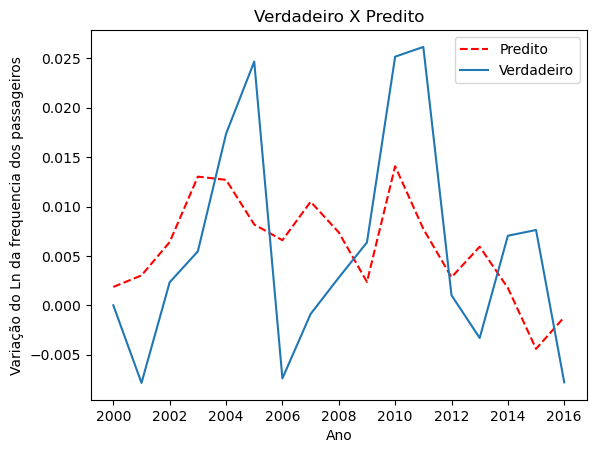

In [65]:
ypred = model.predict(x)
ano_lista = np.arange(2000,2017,1)
principal_igu = principal_igu.loc[principal_igu["Ano"]<2017]


plt.plot(ano_lista,ypred,'--r', label='Predito')
plt.plot(ano_lista, principal_igu["Passageiros_frequencia"], label = 'Verdadeiro' )
plt.title("Verdadeiro X Predito")
plt.xlabel("Ano")
plt.ylabel("Variação do Ln da frequencia dos passageiros")
plt.legend()
plt.show()

# Navegantes

##### juntando os pontos macros e uma unico DataFrame

In [66]:
principal_nvt =(nvt_nac
 .join(nvt_int.set_index('Ano'),on='Ano')
 .join(oil.set_index('Ano'),on='Ano')
 .join(dolar.set_index('Ano'),on='Ano')
 .join(inflacao.set_index('Ano'),on='Ano')
 .join(pib.set_index('Ano'),on='Ano')
          )

##### Correlação entre os dados pré selecionados 

In [67]:
 
principal_nvt = principal_nvt.loc[principal_nvt["Ano"]<2020]

principal_nvt.drop(["Passageiros internacionais","Passageiros_frequencia", "Ano","numero_de_passageiros","Oil"],axis=1).corr()


,Passageiros_freq_defasagem,Câmbio,Inflação,PIB real Brasil
Passageiros_freq_defasagem,1.000000,-0.136459,0.048770,0.207299
Câmbio,-0.136459,1.000000,0.077090,-0.058331
Inflação,0.048770,0.077090,1.000000,-0.353719
PIB real Brasil,0.207299,-0.058331,-0.353719,1.000000


##### Análise grafica

Utilizamos todas as variaveis em loglog para retirar a tendencia dos dados. Nos gráficos de linha em todos eles, os eixos x é o Ano e os eixos y é a variação do dados que está legendado em cada um dos gráficos.

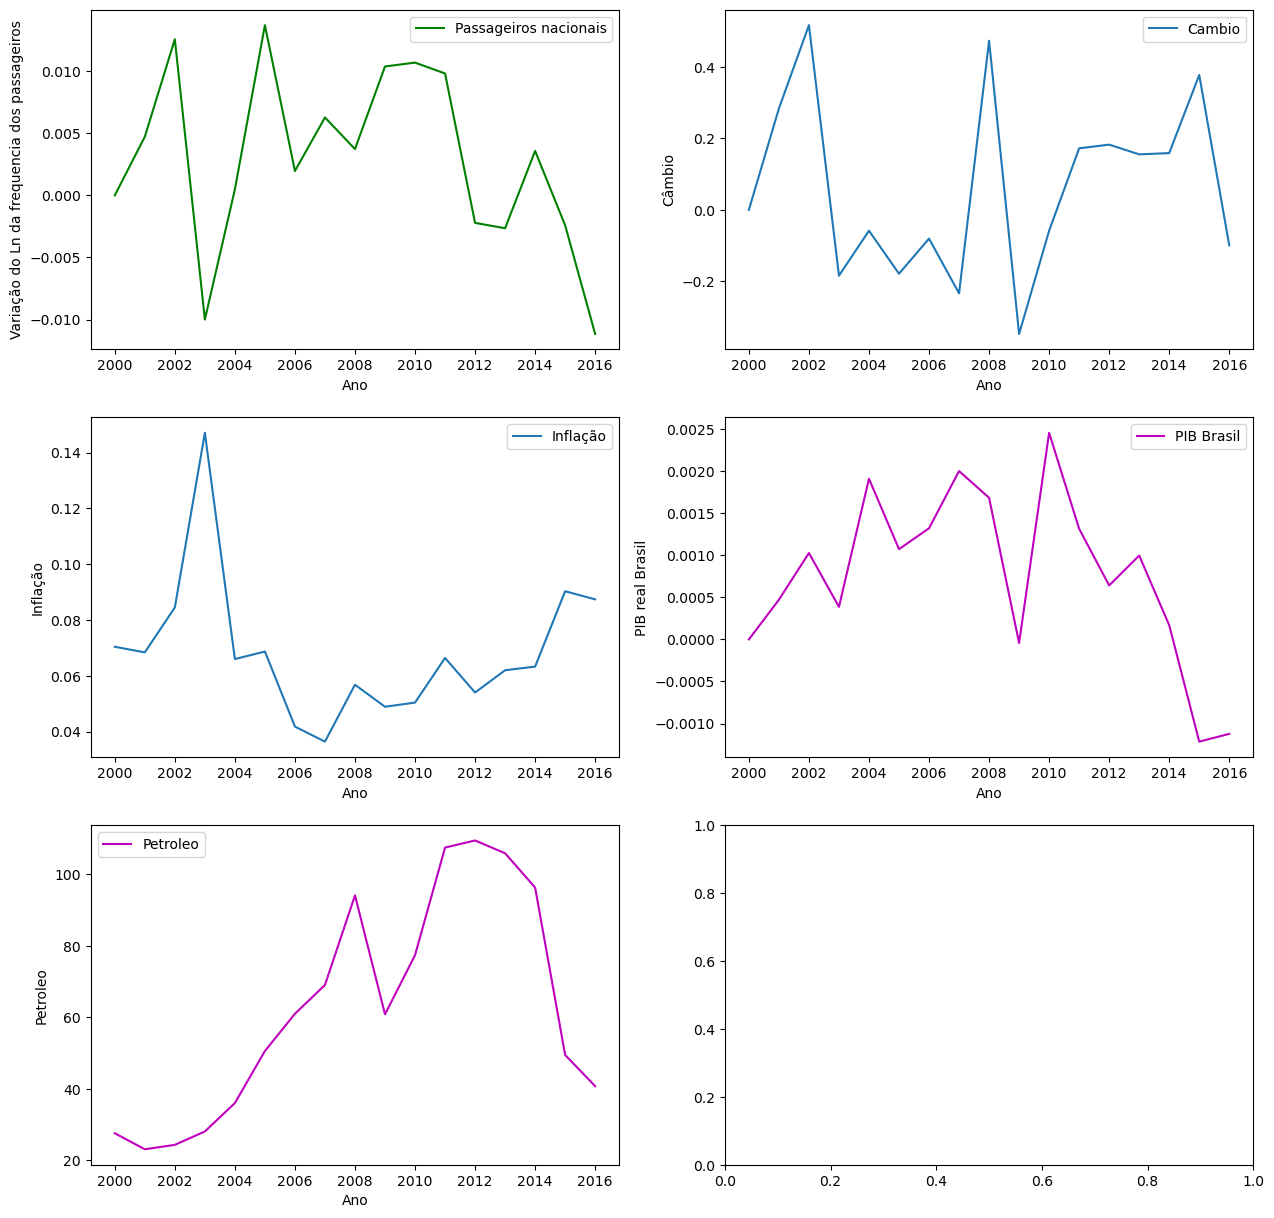

In [68]:
fig, ax = plt.subplots(3,2)

fig.set_size_inches(15,15)



ax[0,0].plot(principal_cwb["Ano"], principal_cwb["Passageiros_frequencia"],"g", label='Passageiros nacionais')
ax[0,0].set_xlabel("Ano")
ax[0,0].set_ylabel("Variação do Ln da frequencia dos passageiros")
ax[0,0].legend()


ax[0,1].plot(principal_cwb["Ano"], principal_cwb["Câmbio"], label = 'Cambio' )
ax[0,1].set_xlabel("Ano")
ax[0,1].set_ylabel("Câmbio")
ax[0,1].legend()

ax[1,0].plot(principal_cwb["Ano"], principal_cwb["Inflação"], label='Inflação')
ax[1,0].set_xlabel("Ano")
ax[1,0].set_ylabel("Inflação")
ax[1,0].legend()


ax[1,1].plot(principal_cwb["Ano"], principal_cwb["PIB real Brasil"],"m", label = 'PIB Brasil' )
ax[1,1].set_xlabel("Ano")
ax[1,1].set_ylabel("PIB real Brasil")
ax[1,1].legend()

ax[2,0].plot(principal_cwb["Ano"], principal_cwb["Oil"],"m", label='Petroleo')
ax[2,0].set_xlabel("Ano")
ax[2,0].set_ylabel("Petroleo")
ax[2,0].legend()

plt.show()

#### Dividindo a base de dados em treinamento e teste

Nas duas células de códigos seguintes temos a parte de treinamento e teste. O treino foi definido do ano 2000 até 2017 e na parte foi colocado todos os anos de 2000 até 2019. A variavel Y(a ser prevista) foi colocado a frequencia dos passageiros e nas variaveis X (Cambio, PIB real do Brasil e Inflação) e foi retirada todas as outras.

In [69]:
treino = principal_nvt.loc[principal_nvt["Ano"] < 2017]
teste = principal_nvt.loc[principal_nvt["Ano"] >= 2000]

In [70]:
y_train= treino["Passageiros_frequencia"].copy()
y_test= teste["Passageiros_frequencia"].copy()

X_train = treino.drop(["Passageiros_frequencia", "Passageiros internacionais","Ano","numero_de_passageiros","Oil"],axis=1).copy()
X_test = teste.drop(["Passageiros_frequencia", "Passageiros internacionais","Ano","numero_de_passageiros","Oil"],axis=1).copy()

### Regresao linear

In [71]:
reg= LinearRegression()
reg.fit(X_train, y_train)
YpredL= reg.predict(X_test)
erro = np.sqrt(mean_squared_error(y_test, YpredL))




#### Dados da regrssao

In [72]:
print(f"Coeficiente da regressão linear: {reg.coef_}")
print(f"Coeficiente angular da reta: {reg.intercept_}")
print(reg.get_params())
print(f"O erro do modelo sem ajuste foi: {erro}")

Coeficiente da regressão linear: [ 0.3621818  -0.02060894 -0.39732499 -4.8627074 ]
Coeficiente angular da reta: 0.033600366493814156
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}
O erro do modelo sem ajuste foi: 0.013164326729327382


##### Tentativa de melhora para a regrssao

In [73]:
pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=1)),
    ('lin_reg', LinearRegression())
    #('lin_reg', Ridge(alpha=ALPHA))
])

params = {
    'poly__degree': [1,2,3]
}

clf_pipe = GridSearchCV(pipe, params, cv=3, n_jobs=-1)

clf_pipe.fit(X_train, y_train)

print(clf_pipe.best_params_)

{'poly__degree': 1}


In [74]:
y_pred_pipeline = clf_pipe.predict(X_train)

##### Erro com ajuste

In [75]:
erro = np.sqrt(mean_squared_error(y_train, y_pred_pipeline))

print(f"O erro do modelo com ajuste foi: {erro}")

O erro do modelo com ajuste foi: 0.013599126988257956


##### RMSE

In [76]:
final_model = clf_pipe.best_estimator_

final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print(f'RMSE = {final_rmse}')

RMSE = 0.013164326729327384


#### Analise com OLS

A regressão linear está analisando um periodo de tempo de 19 anos, se iniciando em 2000 até 2019. Foi utilizada a biblioteca OLS (statsmoldels)

In [77]:
import statsmodels.api as sm


x = sm.add_constant(X_train)

model = sm.OLS(y_train, x).fit()


print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     Passageiros_frequencia   R-squared:                       0.461
Model:                                OLS   Adj. R-squared:                  0.282
Method:                     Least Squares   F-statistic:                     2.569
Date:                    Sun, 04 Dec 2022   Prob (F-statistic):             0.0920
Time:                            16:43:43   Log-Likelihood:                 48.940
No. Observations:                      17   AIC:                            -87.88
Df Residuals:                          12   BIC:                            -83.71
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

c:\Users\guido\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


##### Grafico Verdadeiro X Predito

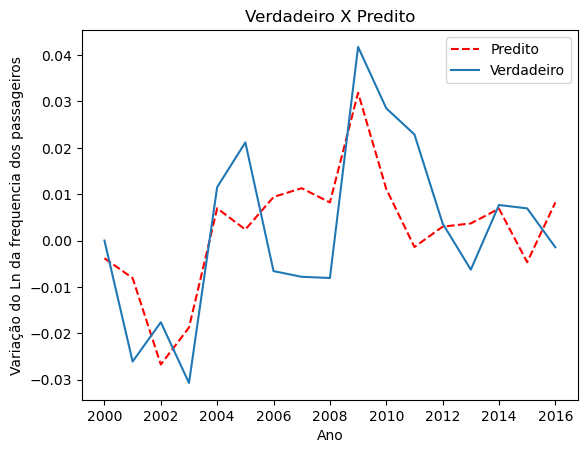

In [78]:
ypred = model.predict(x)
ano_lista = np.arange(2000,2017,1)
principal_nvt = principal_nvt.loc[principal_nvt["Ano"]<2017]


plt.plot(ano_lista,ypred,'--r', label='Predito')
plt.plot(ano_lista, principal_nvt["Passageiros_frequencia"], label = 'Verdadeiro' )
plt.title("Verdadeiro X Predito")
plt.xlabel("Ano")
plt.ylabel("Variação do Ln da frequencia dos passageiros")
plt.legend()
plt.show()

# Palmas

##### juntando os pontos macros e uma unico DataFrame

In [79]:
principal_pmw =(pmw
 .join(oil.set_index('Ano'),on='Ano')
 .join(dolar.set_index('Ano'),on='Ano')
 .join(inflacao.set_index('Ano'),on='Ano')
 .join(pib.set_index('Ano'),on='Ano')
          )

##### Correlação entre os dados pré selecionados 

In [80]:
principal_pmw.loc[principal_pmw["Ano"] == 2019, "Passageiros_freq_defasagem"] = 0 
principal_pmw= principal_pmw.loc[principal_pmw["Ano"]<2020]
principal_pmw.drop(["Passageiros_frequencia", "Ano","numero_de_passageiros","Oil"],axis=1).corr()

,Passageiros_freq_defasagem,Câmbio,Inflação,PIB real Brasil
Passageiros_freq_defasagem,1.000000,-0.418795,0.546400,0.037045
Câmbio,-0.418795,1.000000,0.077090,-0.058331
Inflação,0.546400,0.077090,1.000000,-0.353719
PIB real Brasil,0.037045,-0.058331,-0.353719,1.000000


##### Análise grafica

Utilizamos todas as variaveis em loglog para retirar a tendencia dos dados. Nos gráficos de linha em todos eles, os eixos x é o Ano e os eixos y é a variação do dados que está legendado em cada um dos gráficos.

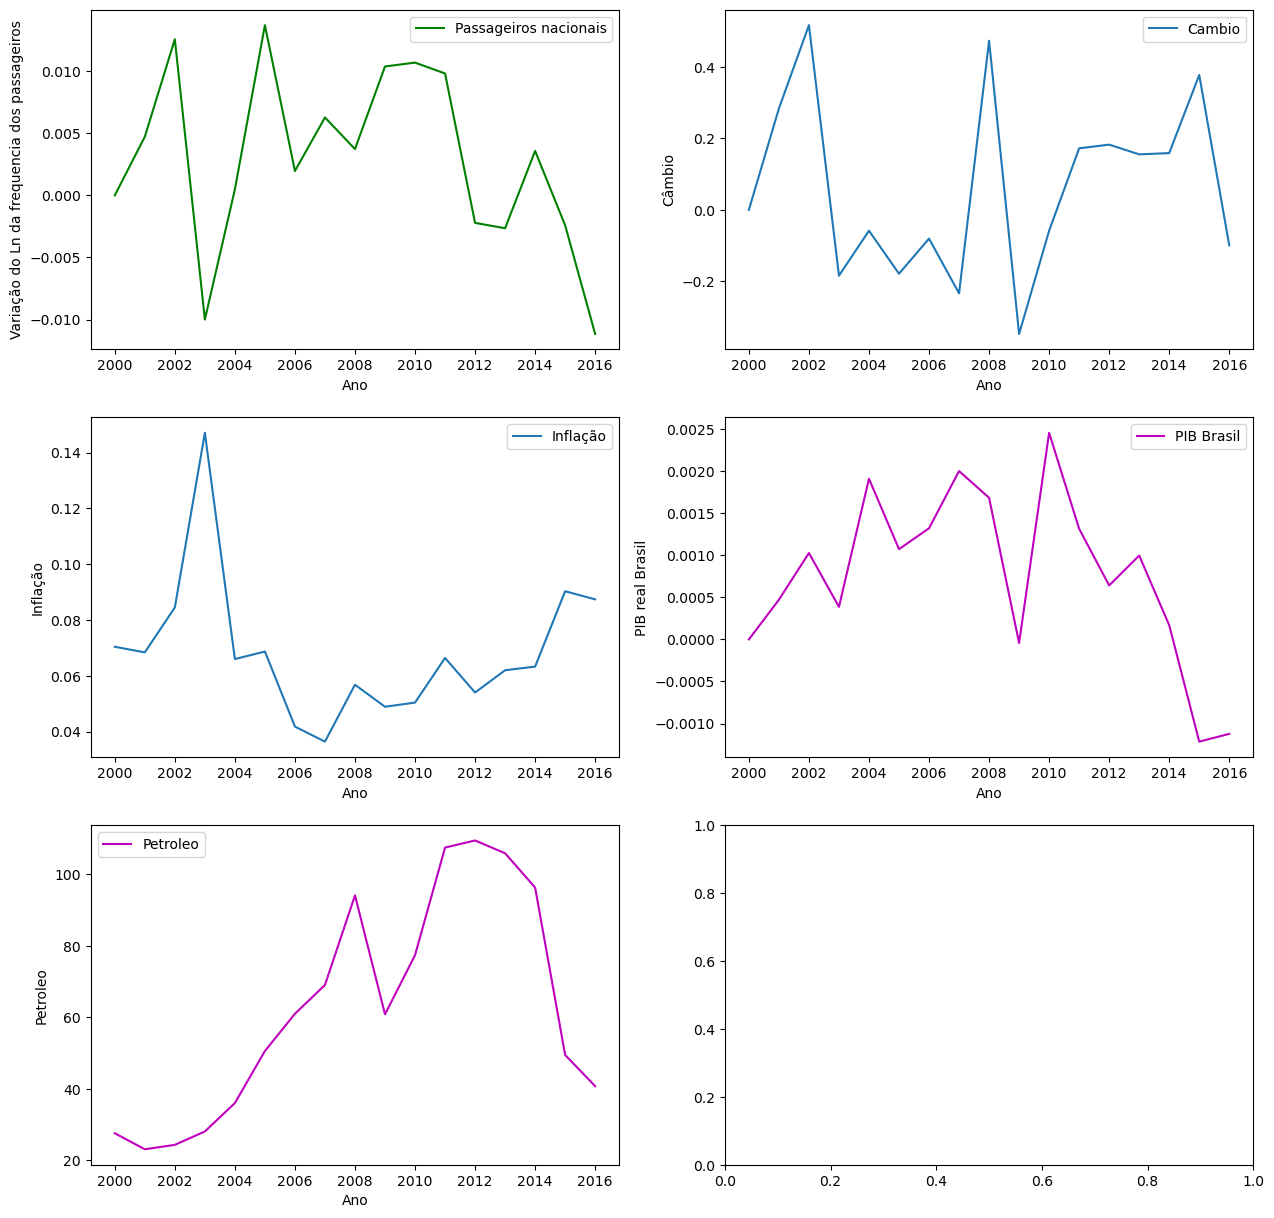

In [81]:
fig, ax = plt.subplots(3,2)

fig.set_size_inches(15,15)



ax[0,0].plot(principal_cwb["Ano"], principal_cwb["Passageiros_frequencia"],"g", label='Passageiros nacionais')
ax[0,0].set_xlabel("Ano")
ax[0,0].set_ylabel("Variação do Ln da frequencia dos passageiros")
ax[0,0].legend()


ax[0,1].plot(principal_cwb["Ano"], principal_cwb["Câmbio"], label = 'Cambio' )
ax[0,1].set_xlabel("Ano")
ax[0,1].set_ylabel("Câmbio")
ax[0,1].legend()

ax[1,0].plot(principal_cwb["Ano"], principal_cwb["Inflação"], label='Inflação')
ax[1,0].set_xlabel("Ano")
ax[1,0].set_ylabel("Inflação")
ax[1,0].legend()


ax[1,1].plot(principal_cwb["Ano"], principal_cwb["PIB real Brasil"],"m", label = 'PIB Brasil' )
ax[1,1].set_xlabel("Ano")
ax[1,1].set_ylabel("PIB real Brasil")
ax[1,1].legend()

ax[2,0].plot(principal_cwb["Ano"], principal_cwb["Oil"],"m", label='Petroleo')
ax[2,0].set_xlabel("Ano")
ax[2,0].set_ylabel("Petroleo")
ax[2,0].legend()

plt.show()

#### Dividindo a base de dados em treinamento e teste

Nas duas células de códigos seguintes temos a parte de treinamento e teste. O treino foi definido do ano 2000 até 2017 e na parte foi colocado todos os anos de 2000 até 2019. A variavel Y(a ser prevista) foi colocado a frequencia dos passageiros e nas variaveis X (Cambio, PIB real do Brasil e Inflação) e foi retirada todas as outras.

In [82]:
treino = principal_pmw.loc[principal_pmw["Ano"] < 2017]
teste = principal_pmw.loc[principal_pmw["Ano"] >= 2000]

In [83]:
y_train= treino["Passageiros_frequencia"].copy()
y_test= teste["Passageiros_frequencia"].copy()

X_train = treino.drop(["Passageiros_frequencia", "Ano","numero_de_passageiros","Oil"],axis=1).copy()
X_test = teste.drop(["Passageiros_frequencia", "Ano","numero_de_passageiros","Oil"],axis=1).copy()

### Regresao linear

In [84]:
reg= LinearRegression()
reg.fit(X_train, y_train)
YpredL= reg.predict(X_test)
erro = np.sqrt(mean_squared_error(y_test, YpredL))



#### Dados da regrssao

In [85]:
print(f"Coeficiente da regressão linear: {reg.coef_}")
print(f"Coeficiente angular da reta: {reg.intercept_}")
print(reg.get_params())
print(f"O erro do modelo sem ajuste foi: {erro}")

Coeficiente da regressão linear: [-1.26940543e-02 -9.85472170e-02 -4.40046180e-01  1.41264903e+01]
Coeficiente angular da reta: 0.035741224690900096
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}
O erro do modelo sem ajuste foi: 0.061955309807587386


##### Tentativa de melhora para a regrssao

In [86]:
pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=1)),
    ('lin_reg', LinearRegression())
    #('lin_reg', Ridge(alpha=ALPHA))
])

params = {
    'poly__degree': [1,2,3]
}

clf_pipe = GridSearchCV(pipe, params, cv=3, n_jobs=-1)

clf_pipe.fit(X_train, y_train)

print(clf_pipe.best_params_)

{'poly__degree': 1}


In [87]:
y_pred_pipeline = clf_pipe.predict(X_train)

##### Erro com ajuste

In [88]:
erro = np.sqrt(mean_squared_error(y_train, y_pred_pipeline))

print(f"O erro do modelo com ajuste foi: {erro}")

O erro do modelo com ajuste foi: 0.06636811622229252


##### RMSE

In [89]:
final_model = clf_pipe.best_estimator_

final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print(f'RMSE = {final_rmse}')

RMSE = 0.061955309807587386


#### Analise com OLS

A regressão linear está analisando um periodo de tempo de 19 anos, se iniciando em 2000 até 2019. Foi utilizada a biblioteca OLS (statsmoldels)

In [90]:
import statsmodels.api as sm


x = sm.add_constant(X_train)

model = sm.OLS(y_train, x).fit()


print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     Passageiros_frequencia   R-squared:                       0.201
Model:                                OLS   Adj. R-squared:                 -0.066
Method:                     Least Squares   F-statistic:                    0.7534
Date:                    Sun, 04 Dec 2022   Prob (F-statistic):              0.575
Time:                            16:43:45   Log-Likelihood:                 21.991
No. Observations:                      17   AIC:                            -33.98
Df Residuals:                          12   BIC:                            -29.82
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

c:\Users\guido\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


##### Grafico Verdadeiro X Predito

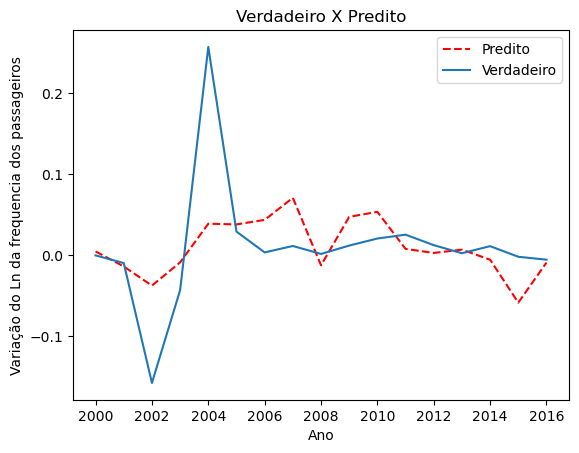

In [91]:
ypred = model.predict(x)
ano_lista = np.arange(2000,2017,1)
principal_pmw = principal_pmw.loc[principal_pmw["Ano"]<2017]


plt.plot(ano_lista,ypred,'--r', label='Predito')
plt.plot(ano_lista, principal_pmw["Passageiros_frequencia"], label = 'Verdadeiro' )
plt.title("Verdadeiro X Predito")
plt.xlabel("Ano")
plt.ylabel("Variação do Ln da frequencia dos passageiros")
plt.legend()
plt.show()

# São Luiz

##### juntando os pontos macros e uma unico DataFrame

In [92]:
principal_slz =(slz
 .join(oil.set_index('Ano'),on='Ano')
 .join(dolar.set_index('Ano'),on='Ano')
 .join(inflacao.set_index('Ano'),on='Ano')
 .join(pib.set_index('Ano'),on='Ano')
          )

##### Correlação entre os dados pré selecionados 

In [93]:
principal_slz.loc[principal_slz["Ano"] == 2019, "Passageiros_freq_defasagem"] = 0 
principal_slz= principal_slz.loc[principal_slz["Ano"]<2020]
principal_slz.drop(["Passageiros_frequencia", "Ano","numero_de_passageiros","Oil"],axis=1).corr()


,Passageiros_freq_defasagem,Câmbio,Inflação,PIB real Brasil
Passageiros_freq_defasagem,1.000000,-0.358100,0.157277,0.275966
Câmbio,-0.358100,1.000000,0.077090,-0.058331
Inflação,0.157277,0.077090,1.000000,-0.353719
PIB real Brasil,0.275966,-0.058331,-0.353719,1.000000


##### Análise grafica

Utilizamos todas as variaveis em loglog para retirar a tendencia dos dados. Nos gráficos de linha em todos eles, os eixos x é o Ano e os eixos y é a variação do dados que está legendado em cada um dos gráficos.

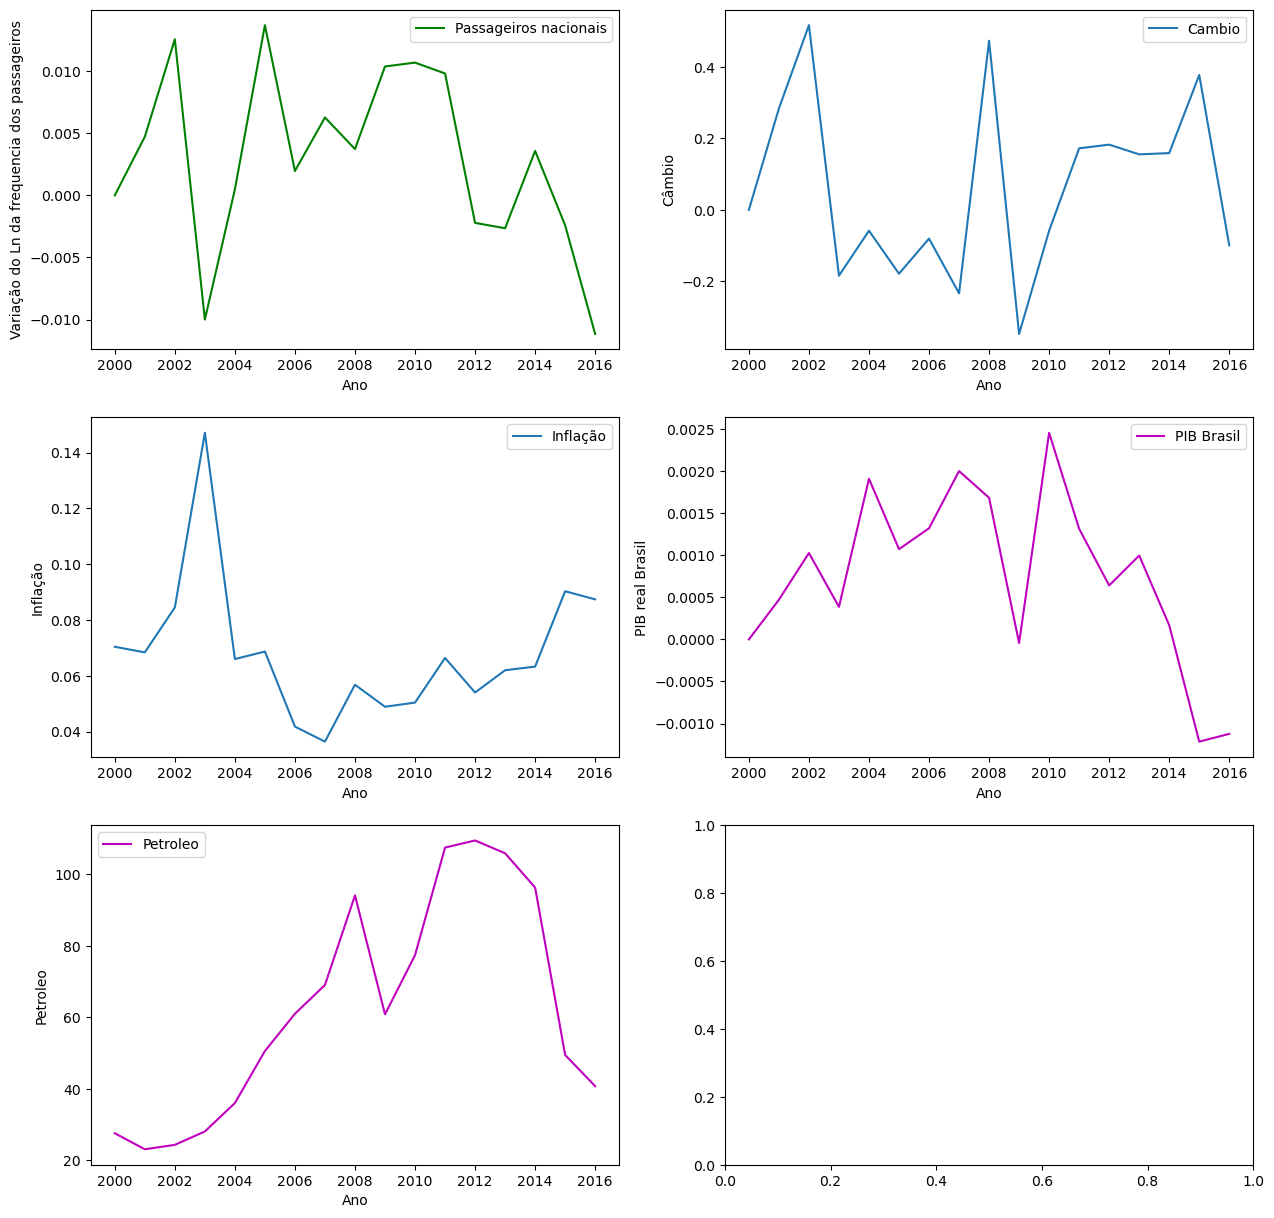

In [94]:
fig, ax = plt.subplots(3,2)

fig.set_size_inches(15,15)



ax[0,0].plot(principal_cwb["Ano"], principal_cwb["Passageiros_frequencia"],"g", label='Passageiros nacionais')
ax[0,0].set_xlabel("Ano")
ax[0,0].set_ylabel("Variação do Ln da frequencia dos passageiros")
ax[0,0].legend()


ax[0,1].plot(principal_cwb["Ano"], principal_cwb["Câmbio"], label = 'Cambio' )
ax[0,1].set_xlabel("Ano")
ax[0,1].set_ylabel("Câmbio")
ax[0,1].legend()

ax[1,0].plot(principal_cwb["Ano"], principal_cwb["Inflação"], label='Inflação')
ax[1,0].set_xlabel("Ano")
ax[1,0].set_ylabel("Inflação")
ax[1,0].legend()


ax[1,1].plot(principal_cwb["Ano"], principal_cwb["PIB real Brasil"],"m", label = 'PIB Brasil' )
ax[1,1].set_xlabel("Ano")
ax[1,1].set_ylabel("PIB real Brasil")
ax[1,1].legend()

ax[2,0].plot(principal_cwb["Ano"], principal_cwb["Oil"],"m", label='Petroleo')
ax[2,0].set_xlabel("Ano")
ax[2,0].set_ylabel("Petroleo")
ax[2,0].legend()

plt.show()

#### Dividindo a base de dados em treinamento e teste

Nas duas células de códigos seguintes temos a parte de treinamento e teste. O treino foi definido do ano 2000 até 2017 e na parte foi colocado todos os anos de 2000 até 2019. A variavel Y(a ser prevista) foi colocado a frequencia dos passageiros e nas variaveis X (Cambio, PIB real do Brasil e Inflação) e foi retirada todas as outras.

In [95]:
treino = principal_slz.loc[principal_slz["Ano"] < 2017]
teste = principal_slz.loc[principal_slz["Ano"] >= 2000]

In [96]:
y_train= treino["Passageiros_frequencia"].copy()
y_test= teste["Passageiros_frequencia"].copy()

X_train = treino.drop(["Passageiros_frequencia", "Ano","numero_de_passageiros","Oil"],axis=1).copy()
X_test = teste.drop(["Passageiros_frequencia", "Ano","numero_de_passageiros","Oil"],axis=1).copy()

### Regresao linear

In [97]:
reg= LinearRegression()
reg.fit(X_train, y_train)
YpredL= reg.predict(X_test)
erro = np.sqrt(mean_squared_error(y_test, YpredL))



#### Dados da regrssao

In [98]:
print(f"Coeficiente da regressão linear: {reg.coef_}")
print(f"Coeficiente angular da reta: {reg.intercept_}")
print(reg.get_params())
print(f"O erro do modelo sem ajuste foi: {erro}")

Coeficiente da regressão linear: [ 6.49308612e-02 -4.25987912e-03  1.02121591e-01  5.36623636e+00]
Coeficiente angular da reta: -0.0053368076587984046
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}
O erro do modelo sem ajuste foi: 0.009789083838715512


##### Tentativa de melhora para a regrssao

In [99]:
pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=1)),
    ('lin_reg', LinearRegression())
    #('lin_reg', Ridge(alpha=ALPHA))
])

params = {
    'poly__degree': [1,2,3]
}

clf_pipe = GridSearchCV(pipe, params, cv=3, n_jobs=-1)

clf_pipe.fit(X_train, y_train)

print(clf_pipe.best_params_)

{'poly__degree': 1}


In [100]:
y_pred_pipeline = clf_pipe.predict(X_train)

##### Erro com ajuste

In [101]:
erro = np.sqrt(mean_squared_error(y_train, y_pred_pipeline))

print(f"O erro do modelo com ajuste foi: {erro}")

O erro do modelo com ajuste foi: 0.010259169184529404


##### RMSE

In [102]:
final_model = clf_pipe.best_estimator_

final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print(f'RMSE = {final_rmse}')

RMSE = 0.00978908383871551


#### Analise com OLS

A regressão linear está analisando um periodo de tempo de 19 anos, se iniciando em 2000 até 2019. Foi utilizada a biblioteca OLS (statsmoldels)

In [103]:
import statsmodels.api as sm


x = sm.add_constant(X_train)

model = sm.OLS(y_train, x).fit()


print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     Passageiros_frequencia   R-squared:                       0.207
Model:                                OLS   Adj. R-squared:                 -0.057
Method:                     Least Squares   F-statistic:                    0.7853
Date:                    Sun, 04 Dec 2022   Prob (F-statistic):              0.556
Time:                            16:43:47   Log-Likelihood:                 53.731
No. Observations:                      17   AIC:                            -97.46
Df Residuals:                          12   BIC:                            -93.30
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

c:\Users\guido\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


##### Grafico Verdadeiro X Predito

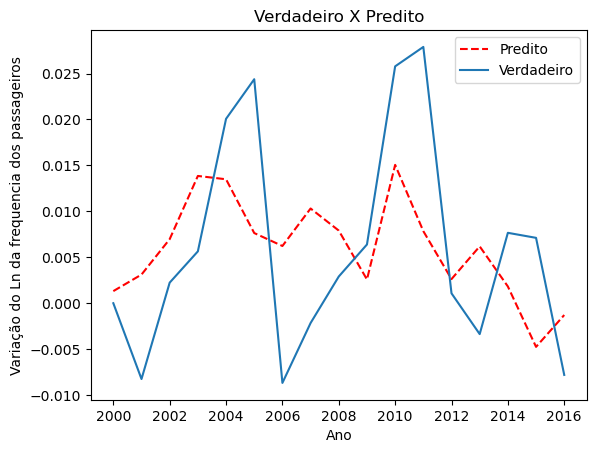

In [104]:
ypred = model.predict(x)
ano_lista = np.arange(2000,2017,1)
principal_slz = principal_slz.loc[principal_slz["Ano"]<2017]


plt.plot(ano_lista,ypred,'--r', label='Predito')
plt.plot(ano_lista, principal_slz["Passageiros_frequencia"], label = 'Verdadeiro' )
plt.title("Verdadeiro X Predito")
plt.xlabel("Ano")
plt.ylabel("Variação do Ln da frequencia dos passageiros")
plt.legend()
plt.show()